In [1]:
!pip install plotly
!pip install numpy
!conda install -c plotly plotly-orca -y
!conda install psutil -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from utils.GeneticEngine import GeneticEngine

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='svg'

In [3]:
def decode_individual(individual):
  return "".join([chr(x) for x in individual])

def fitness_method(individual):
  solution = decode_individual(individual)
  desired_solution = 'neuralnetworkoptimizer'
  matches = 0
  for i in range(len(solution)):
    if (solution[i] == desired_solution[i]):
      matches += 1
  return matches

def generate_individual():
    prospect = []
    for i in range(0, len('neuralnetworkoptimizer')):
      ascii = random.randint(97, 122)
      prospect.append(ascii)
    return prospect

def mutate_individual(individual):
  idx_to_modify = random.randint(0, len(individual)-1)
  individual[idx_to_modify] = random.randint(97, 122)
  return individual

def end_criteria(current_max_result):
  return current_max_result == len('neuralnetworkoptimizer')

In [8]:
GE = GeneticEngine(2000,len('neuralnetworkoptimizer'),generate_individual,"tournament","crossover",mutate_individual,0.2,fitness_method,end_criteria)
GE.run(100)

Generation: 1
Evaluation
	- Selection,Reproduction & Mutation
Generation: 2
Evaluation
	- Selection,Reproduction & Mutation
Generation: 3
Evaluation
	- Selection,Reproduction & Mutation
Generation: 4
Evaluation
	- Selection,Reproduction & Mutation
Generation: 5
Evaluation
	- Selection,Reproduction & Mutation
Generation: 6
Evaluation
	- Selection,Reproduction & Mutation
Generation: 7
Evaluation
	- Selection,Reproduction & Mutation
Generation: 8
Evaluation
	- Selection,Reproduction & Mutation
Generation: 9
Evaluation
	- Selection,Reproduction & Mutation
Generation: 10
Evaluation
	- Selection,Reproduction & Mutation
Generation: 11
Evaluation
	- Selection,Reproduction & Mutation
Generation: 12
Evaluation
	- Selection,Reproduction & Mutation
Generation: 13
Evaluation
	- Selection,Reproduction & Mutation
Generation: 14
Evaluation
	- Selection,Reproduction & Mutation
Generation: 15
Evaluation
Criteria met


([110,
  101,
  117,
  114,
  97,
  108,
  110,
  101,
  116,
  119,
  111,
  114,
  107,
  111,
  112,
  116,
  105,
  109,
  105,
  122,
  101,
  114],
 22)

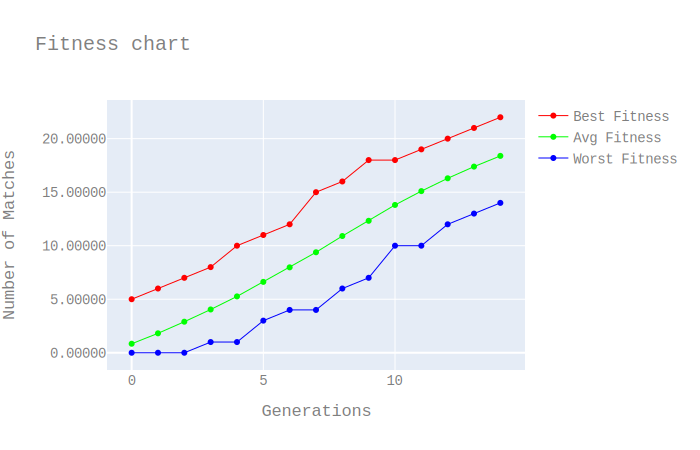

In [10]:
def create_figure():
    return go.Figure()
  
def plot_figure(fig, data, color, title):  
    
    y_axis = data
    fig.add_scatter(
        y=y_axis,
        mode="lines+markers", 
        textposition="bottom center",
        name=title,
        line={"color": color, "width": 1}
    )
    fig.update_layout(
        title="Fitness chart",
        xaxis_title="Generations",
        yaxis={"title": "Number of Matches", "tickformat": ".5f"},
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#7f7f7f"
        )
    )

fig = create_figure()

plot_figure(fig, GE.historic_max_metric, 'rgb(255,0,0)', 'Best Fitness')
plot_figure(fig, GE.historic_mean_metric, 'rgb(0,255,0)', 'Avg Fitness')
plot_figure(fig, GE.historic_min_metric, 'rgb(0,0,255)', 'Worst Fitness')
    
fig.show()


